# Introduction

**An ischemic stroke occurs when the blood supply to part of the brain is interrupted or reduced, preventing brain tissue from getting oxygen and nutrients. Brain cells begin to die in minutes.**

**A stroke is a medical emergency, and prompt treatment is crucial. Early action can reduce brain damage and other complications.**


<h1 align="center"> Stroke data Analysis and Exploration</h1>
<center><img src="https://th.bing.com/th/id/R.5e00de7171ba56faf3155bae457c1b5b?rik=2trU%2f2nW8Zjitw&pid=ImgRaw&r=0" width="60%" >


**In the next few lines of code, I reviewed several features that affect the individual and that may lead to a stroke. I reviewed those features and explained the results we obtained in detail....**

**Enjoy learning...**

In [246]:
Agenda = {
    1:"Importing what I want",
    2:"Loading our data",
    3:"Let's take a look at the data",
    4:"Missing Values",
    5:"Some notation",
    6:"Analysis the data"
}

Agenda

{1: 'Importing what I want',
 2: 'Loading our data',
 3: "Let's take a look at the data",
 4: 'Missing Values',
 5: 'Some notation',
 6: 'Analysis the data'}

## 1. Importing what I want

In [247]:
# importing some libraries
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# ignore the warnings
import warnings
warnings.filterwarnings('ignore')

## 2. Loading our data 

In [248]:
data = pd.read_csv("../input/stroke-prediction-dataset/healthcare-dataset-stroke-data.csv")

## 3. Let's take a look at the data

In [249]:
data.shape

(5110, 12)

> **The volume of data seems rather good in order to build a neural network if necessary**

In [250]:
data.head(5)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [251]:
data.columns

Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

## 3.1 Here is a definition of these columns:
Attribute Information
* id: unique identifier
* gender: "Male", "Female" or "Other"
* age: age of the patient
* hypertension: 0 if the patient doesn't have hypertension, 1 if the patient has hypertension
* heart_disease: 0 if the patient doesn't have any heart diseases, 1 if the patient has a heart disease
* ever_married: "No" or "Yes"
* work_type: "children", "Govt_jov", "Never_worked", "Private" or "Self-employed"
* Residence_type: "Rural" or "Urban"
* avg_glucose_level: average glucose level in blood
* bmi: body mass index
* smoking_status: "formerly smoked", "never smoked", "smokes" or "Unknown"*
* stroke: 1 if the patient had a stroke or 0 if not
> * **Note: "Unknown" in smoking_status means that the information is unavailable for this patient and any other of columns**

In [252]:
# we do not need this column now 
data = data.drop(["id"], axis=1)

In [253]:
# This code also helps us extract numeric columns, isn't that a good thing?
data.describe()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [254]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5110 non-null   object 
 1   age                5110 non-null   float64
 2   hypertension       5110 non-null   int64  
 3   heart_disease      5110 non-null   int64  
 4   ever_married       5110 non-null   object 
 5   work_type          5110 non-null   object 
 6   Residence_type     5110 non-null   object 
 7   avg_glucose_level  5110 non-null   float64
 8   bmi                4909 non-null   float64
 9   smoking_status     5110 non-null   object 
 10  stroke             5110 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 439.3+ KB


In [255]:
data_dtype = data.dtypes
data_dtype.value_counts()

object     5
float64    3
int64      3
dtype: int64

In [256]:
# Let's look at the unique values for each column:
for i in data.columns:
    if i in ("age", "avg_glucose_level", "bmi"):  # this columns include many values
        continue
    else:
        print(i,data[i].unique())

gender ['Male' 'Female' 'Other']
hypertension [0 1]
heart_disease [1 0]
ever_married ['Yes' 'No']
work_type ['Private' 'Self-employed' 'Govt_job' 'children' 'Never_worked']
Residence_type ['Urban' 'Rural']
smoking_status ['formerly smoked' 'never smoked' 'smokes' 'Unknown']
stroke [1 0]


## 4. Missing Values:

In [257]:
data.isnull().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

> **It seems that we have missing values that we will deal with when we delve deeper into the analysis at the column level.**

<AxesSubplot:>

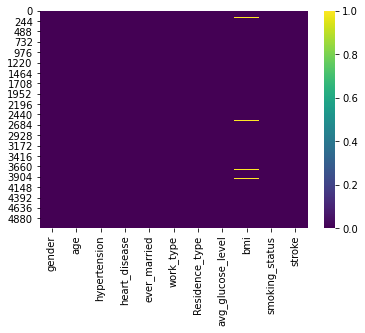

In [258]:
# Draw the missing values on the map.
sns.heatmap(data.isnull(),cbar=True, cmap='viridis')

In [259]:
# drop rows iin data with null values
data = data.dropna(axis=0, subset=['bmi'])

In [260]:
data.shape

(4909, 11)

## 5. Some notation

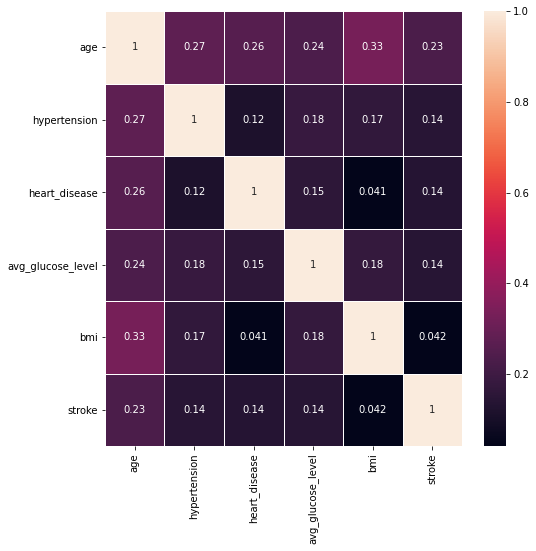

In [261]:
#The heat map shows the relationships between the columns and each other, it's good.
fig, ax = plt.subplots(figsize=(8,8))
sns.heatmap(data.corr(), annot=True, linewidths=.5, ax=ax)
plt.show()

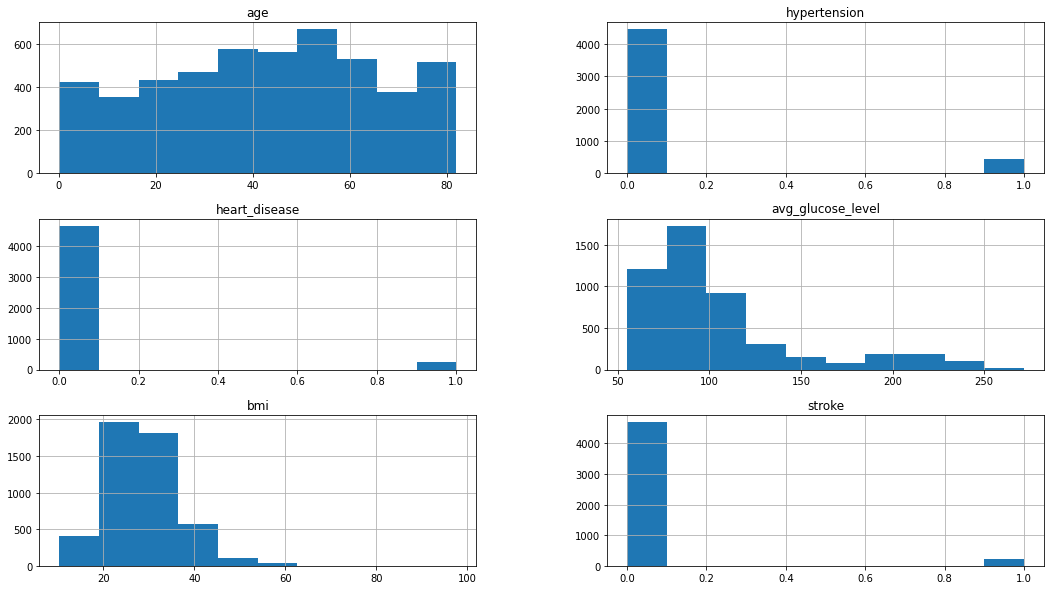

In [262]:
data.hist(figsize=(18,10))
plt.show()

> **One of the columns has a positive skewness with a positive tail as well.**

> **Let's start by asking questions and answering them through analysis, and in doing so we will get rid of missing and outliers and do aggregate data analytics.**

**Let's continue.....**

> **Now let's start asking questions and answering them through analysis, let's change the plan. I will answer the questions without asking a question, meaning that I will leave the leadership to the data, where will it take me.**

## 6. Analysis the data 

## 6.1 Target column

In [263]:
data["stroke"].value_counts()

0    4700
1     209
Name: stroke, dtype: int64

<AxesSubplot:xlabel='stroke', ylabel='count'>

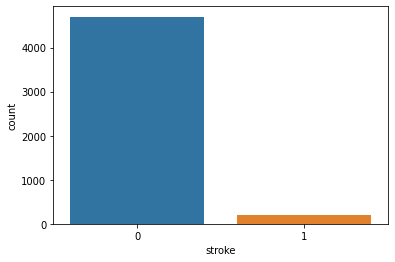

In [264]:
sns.countplot(data=data,x='stroke')

> **The following figure is in order to determine the proportions of stroke incidence from no injury in the data.**

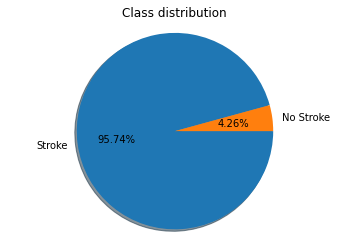

In [265]:
class_occur = data['stroke'].value_counts()
class_names = ['Stroke', 'No Stroke']
fig, ax = plt.subplots()
ax.pie(class_occur, labels=class_names, autopct='%1.2f%%',
        shadow=True, startangle=0, counterclock=False)
ax.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
ax.set_title('Class distribution')
plt.show()

> **It is very clear that the number of casualties in this data is very small.**

## 6.2 Gender column 

In [266]:
# x = txt.replace("now value", "then")
data["gender"] = data["gender"].replace("Other", "Male")

In [267]:
# maping gender in the target column
 
def gender_to_num(df):
    if df['gender'] == 'Male':
        return 0
    elif df['gender'] == 'Female':
        return 1
    else:
        return 99

In [268]:
data["gender"] = data.apply(gender_to_num, axis = 1)

In [269]:
# Let's look at the different values for that column.
data["gender"].unique()

array([0, 1])

In [270]:
#The results of the previous code are interesting so let's look at the number of each of those values.
data["gender"].value_counts()

1    2897
0    2012
Name: gender, dtype: int64

<AxesSubplot:xlabel='gender', ylabel='count'>

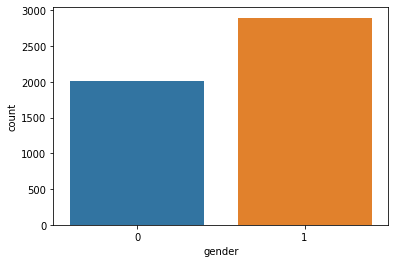

In [271]:
# The following figure shows that the number of women is higher than the number of men, so we may witness a bias in the results in favor of women.
sns.countplot(data=data,x='gender')

<AxesSubplot:xlabel='gender', ylabel='count'>

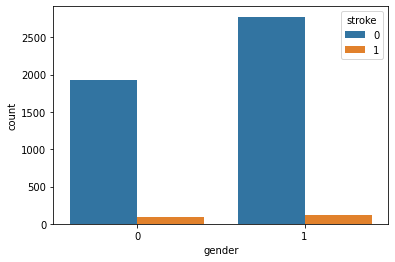

In [272]:
sns.countplot(data=data,x='gender',hue='stroke')

> **We note here that the number of infected women is slightly greater than the number of women, and this may be due to the fact that the data includes more women than men**

## 6.3 Age column

In [273]:
data["age"].describe()

count    4909.000000
mean       42.865374
std        22.555115
min         0.080000
25%        25.000000
50%        44.000000
75%        60.000000
max        82.000000
Name: age, dtype: float64

Text(0.5, 0, 'age Column Distribution')

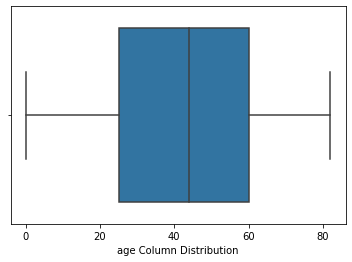

In [274]:
sns.boxplot('age',data=data) 
plt.xlabel('age Column Distribution')

> **We note that the values combine between the values of 30 years and approximately 60 years.**

<AxesSubplot:xlabel='age', ylabel='Density'>

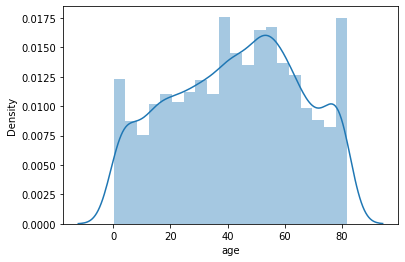

In [275]:
# Let's see the distribution of the data.
#histogram
sns.distplot(data['age'])

In [276]:
# This instruction shows the number of unique elements in the column, not the values.
data["age"].nunique()

104

> **To facilitate the analysis process, I divided the age column into age groups, as follows:**
* 0 - 18
* 19 - 25 
* 26 - 35 
* 36 - 45 
* 46 - 55 
* 56 - 65 
* 66 - 75 
* +75 

In [277]:
# I set this function to achieve what we want:
def age_groups(age):
    if age >= 75:
        return('+75 ')
    elif age > 65:
        return('66 - 75 ')
    elif age > 55:
        return('56 - 65 ')
    elif age > 45:
        return('46 - 55 ')
    elif age > 35:
        return('36 - 45 ')
    elif age > 25:
        return('26 - 35 ')
    elif age > 18:
        return('19 - 25 ')
    elif age > 0:
        return('0 - 18 ')
    else:
        return(None)

In [278]:
# Now I will create a new column to display the results.
data['Age_group'] = data['age'].apply(age_groups)

In [279]:
data.head(10)

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,Age_group
0,0,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1,66 - 75
2,0,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1,+75
3,1,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1,46 - 55
4,1,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1,+75
5,0,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1,+75
6,0,74.0,1,1,Yes,Private,Rural,70.09,27.4,never smoked,1,66 - 75
7,1,69.0,0,0,No,Private,Urban,94.39,22.8,never smoked,1,66 - 75
9,1,78.0,0,0,Yes,Private,Urban,58.57,24.2,Unknown,1,+75
10,1,81.0,1,0,Yes,Private,Rural,80.43,29.7,never smoked,1,+75
11,1,61.0,0,1,Yes,Govt_job,Rural,120.46,36.8,smokes,1,56 - 65


<AxesSubplot:xlabel='gender', ylabel='count'>

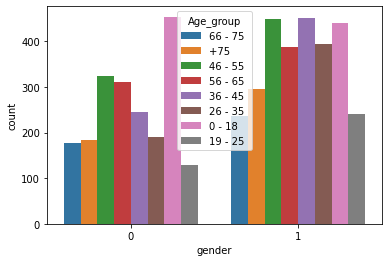

In [280]:
sns.countplot(data=data,x='gender',hue='Age_group')

> **From the figure, we can say that the rates of stroke in women increase from the beginning of the year 35 to reach their maximum in the year 46 and continue until the year 55.**

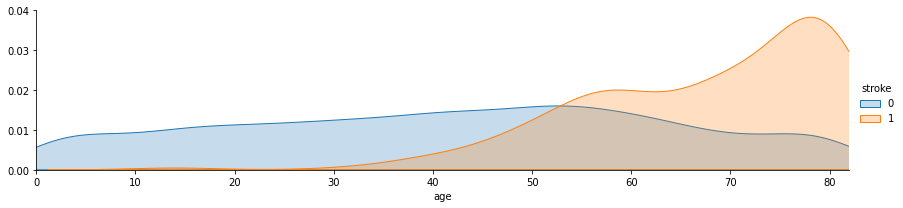

In [281]:
fig = sns.FacetGrid(data, hue="stroke",aspect=4)
fig.map(sns.kdeplot,'age',shade= True)
oldest = data['age'].max()
fig.set(xlim=(0,oldest))
fig.add_legend()

> **In general, the number of cases of infection increases significantly between the sexes, starting from the age of 50 years and continues to rise frighteningly, reaching the maximum number of cases between 74 years and 80 years, according to the largest value in the age column that we have come to in the data.**

## 6.4 Hypertension column

In [282]:
data["hypertension"].unique()

array([0, 1])

> **hypertension: 0 if the patient doesn't have hypertension, 1 if the patient has hypertension**

<AxesSubplot:xlabel='gender', ylabel='count'>

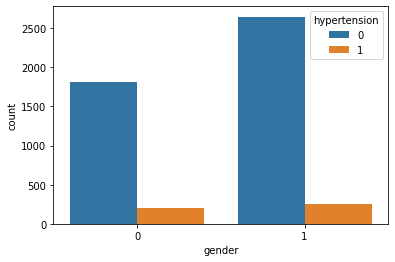

In [283]:
sns.countplot(data=data,x='gender',hue='hypertension')

> **Women suffer from high blood pressure less than men, and this is due to the fact that the number of women included in the data is greater than the number of men.**

<AxesSubplot:xlabel='Age_group', ylabel='count'>

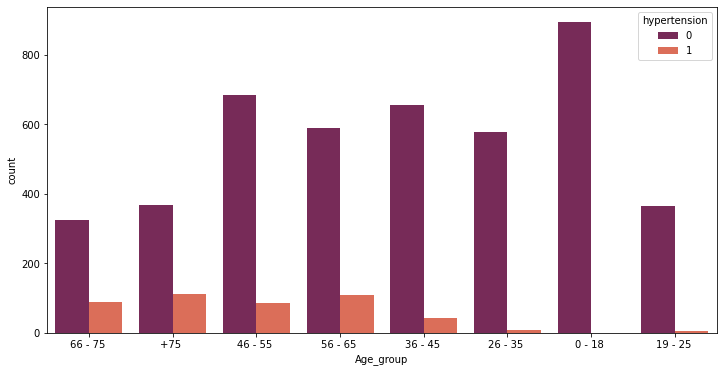

In [284]:
plt.figure(figsize=(12,6))
sns.countplot(x="Age_group",hue="hypertension" , data=data,palette="rocket")

> **The rates of high blood pressure increase significantly, starting from the age of 36 and increasing until I reach the age of 80, and these values were referred to previously, in the same years the rates of heart attack increase in women.**

> **focus more...**

## 6.5 Heart_disease column 

In [285]:
data["heart_disease"].unique()

array([1, 0])

> **heart_disease: 0 if the patient doesn't have any heart diseases, 1 if the patient has a heart disease**

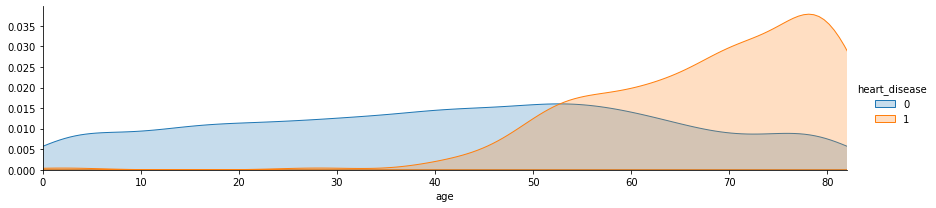

In [286]:
fig = sns.FacetGrid(data, hue="heart_disease",aspect=4)
fig.map(sns.kdeplot,'age',shade= True)
oldest = data['age'].max()
fig.set(xlim=(0,oldest))
fig.add_legend()

> **From the figure, we notice that the rate of heart disease increases from the beginning of the year 50 and continues to increase steadily until it reaches the age of 80, and therefore this category is the most vulnerable to stroke disease.**

<AxesSubplot:xlabel='hypertension', ylabel='count'>

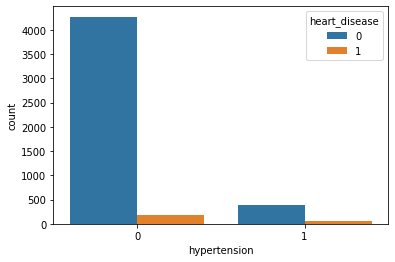

In [287]:
sns.countplot(data=data,x='hypertension',hue='heart_disease')

> **Whenever a person suffers from an increased heart rate, he is also at risk of developing heart disease and consequently having a stroke.**

## 6.6 Ever_married column

In [288]:
data["ever_married"].unique()

array(['Yes', 'No'], dtype=object)

In [289]:
# Here we will convert that column to the three distinct elements.
data["ever_married"]=data["ever_married"].map({"Yes":1 , "No":0 })

<AxesSubplot:xlabel='gender', ylabel='count'>

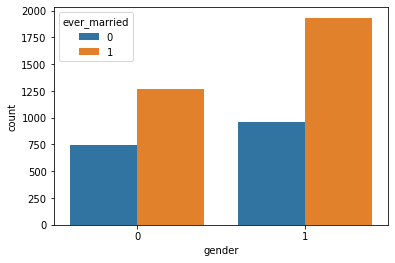

In [290]:
sns.countplot(data=data,x='gender',hue='ever_married')

> **The percentage of married women is higher than the males.**

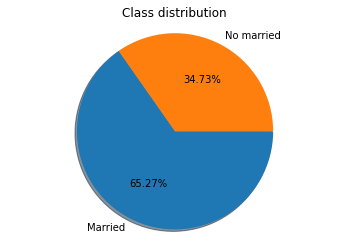

In [291]:
# Here is a more accurate ratio for married and unmarried people.
class_occur = data['ever_married'].value_counts()
class_names = ['Married','No married']
fig, ax = plt.subplots()
ax.pie(class_occur, labels=class_names, autopct='%1.2f%%',
        shadow=True, startangle=0, counterclock=False)
ax.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
ax.set_title('Class distribution')
plt.show()

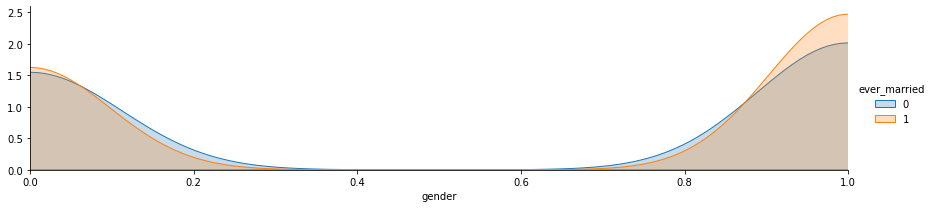

In [292]:
fig = sns.FacetGrid(data, hue="ever_married",aspect=4)
fig.map(sns.kdeplot,'gender',shade= True)
oldest = data['gender'].max()
fig.set(xlim=(0,oldest))
fig.add_legend()

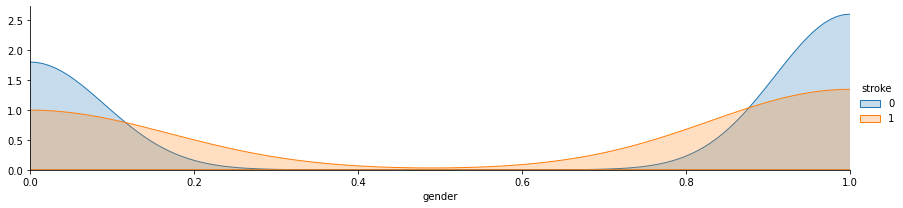

In [293]:
fig = sns.FacetGrid(data, hue="stroke",aspect=4)
fig.map(sns.kdeplot,'gender',shade= True)
oldest = data['gender'].max()
fig.set(xlim=(0,oldest))
fig.add_legend()

<AxesSubplot:xlabel='Age_group', ylabel='count'>

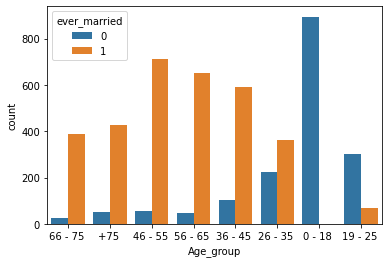

In [294]:
sns.countplot(data=data,x='Age_group',hue='ever_married')

> **The rate of marriage of men and women increases significantly from the year 35 and continues to rise until it reaches its maximum value in 55 years and then begins to decline slightly.**

> **Relying on the previous graphs, and since women are more numerous, the marriage rate of women is higher than men, and the rate of high blood pressure in women is higher than men, and based on the values of previous ages, we conclude that the incidence of stroke diseases among married people is higher.**

In [295]:
data.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,Age_group
0,0,67.0,0,1,1,Private,Urban,228.69,36.6,formerly smoked,1,66 - 75
2,0,80.0,0,1,1,Private,Rural,105.92,32.5,never smoked,1,+75
3,1,49.0,0,0,1,Private,Urban,171.23,34.4,smokes,1,46 - 55
4,1,79.0,1,0,1,Self-employed,Rural,174.12,24.0,never smoked,1,+75
5,0,81.0,0,0,1,Private,Urban,186.21,29.0,formerly smoked,1,+75


## 6.7 Work_type column

In [296]:
data["work_type"].unique()

array(['Private', 'Self-employed', 'Govt_job', 'children', 'Never_worked'],
      dtype=object)

In [297]:
data["work_type"].value_counts()

Private          2811
Self-employed     775
children          671
Govt_job          630
Never_worked       22
Name: work_type, dtype: int64

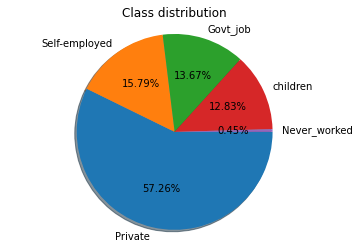

In [298]:
# Here we get the most accurate proportions.
class_occur = data['work_type'].value_counts()
class_names = ['Private', 'Self-employed', 'Govt_job', 'children', 'Never_worked']
fig, ax = plt.subplots()
ax.pie(class_occur, labels=class_names, autopct='%1.2f%%',
        shadow=True, startangle=0, counterclock=False)
ax.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
ax.set_title('Class distribution')
plt.show()

<AxesSubplot:xlabel='work_type', ylabel='count'>

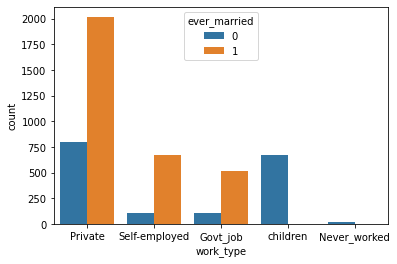

In [299]:
sns.countplot(data=data,x='work_type',hue='ever_married')

> **We note that married people working in the private sector are higher than the rest of the groups, and this can be due to several factors, including that the salaries of workers in the private sector are higher and therefore they can marry.**

<AxesSubplot:xlabel='work_type', ylabel='count'>

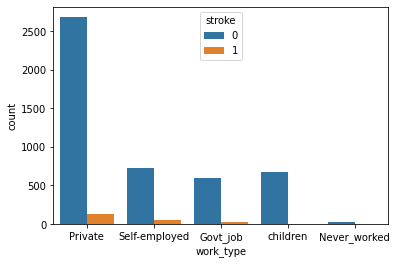

In [300]:
sns.countplot(data=data,x='work_type',hue='stroke')

**But everything has its consequences. From the figure, we note the high rate of stroke among people working in the private sector.**

<AxesSubplot:xlabel='work_type', ylabel='count'>

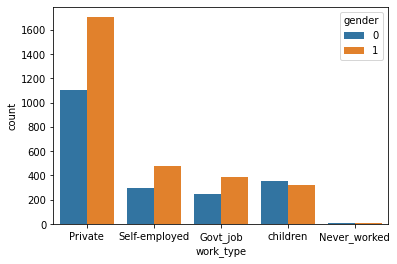

In [301]:
sns.countplot(data=data,x='work_type',hue='gender')

**It is clear that the percentage of workers in the private sector consists of married women, and therefore they are more likely to have a stroke.**

In [302]:
# Of course, I can carry out this process through one of the tools, but it is okay, the conversion elements are few.
# Here we will convert that column to the three distinct elements.
data["work_type"]=data["work_type"].map({'Private':0, 'Self-employed':1, 'Govt_job':2, 'children':3, 'Never_worked':4 })

In [303]:
data["work_type"].unique()

array([0, 1, 2, 3, 4])

## 6.8 Residence_type column

In [304]:
data["Residence_type"].value_counts()

Urban    2490
Rural    2419
Name: Residence_type, dtype: int64

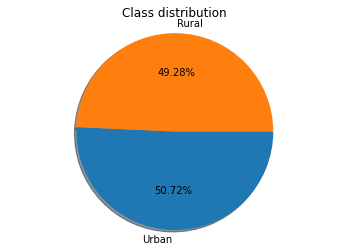

In [305]:
# Here we get the most accurate proportions.
class_occur = data['Residence_type'].value_counts()
class_names = ['Urban', 'Rural']
fig, ax = plt.subplots()
ax.pie(class_occur, labels=class_names, autopct='%1.2f%%',
        shadow=True, startangle=0, counterclock=False)
ax.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
ax.set_title('Class distribution')
plt.show()

**The difference between the place of residence is almost non-existent, so let's continue and see, perhaps the place of residence affects other things.....**

<AxesSubplot:xlabel='Residence_type', ylabel='count'>

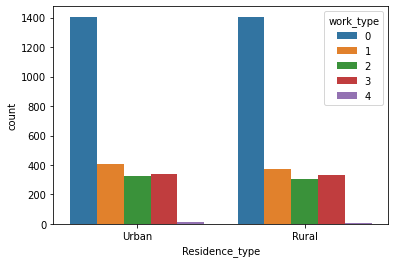

In [306]:
sns.countplot(data=data,x='Residence_type',hue='work_type')

<AxesSubplot:xlabel='Residence_type', ylabel='count'>

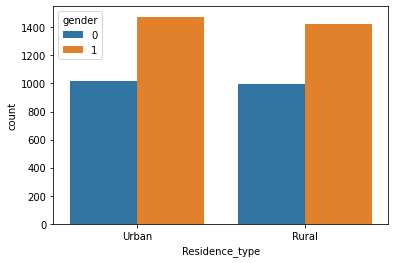

In [307]:
sns.countplot(data=data,x='Residence_type',hue='gender')

**This feature seems to be ineffective. It will be influential if we expand the data to include more features about each current column in the data. It also varies from one country to another in terms of education, income, health, marriage, and others, and this greatly affects the rate of stroke.**

## 6.9 Avg_glucose_level column

In [308]:
data["avg_glucose_level"].describe()

count    4909.000000
mean      105.305150
std        44.424341
min        55.120000
25%        77.070000
50%        91.680000
75%       113.570000
max       271.740000
Name: avg_glucose_level, dtype: float64

In [309]:
data["avg_glucose_level"].value_counts()

93.88     6
83.16     5
72.49     5
91.85     5
91.68     5
         ..
228.05    1
66.25     1
94.44     1
120.09    1
60.50     1
Name: avg_glucose_level, Length: 3852, dtype: int64

Text(0.5, 0, 'avg_glucose_level Column Distribution')

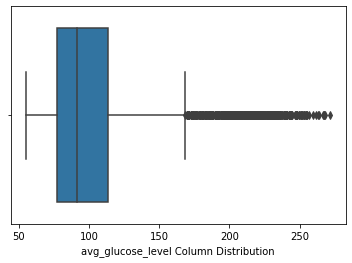

In [310]:
sns.boxplot('avg_glucose_level',data=data) 
plt.xlabel('avg_glucose_level Column Distribution')

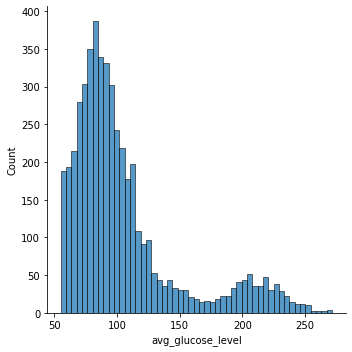

In [311]:
sns.displot(data['avg_glucose_level'])

> **To facilitate the analysis, we modified the previous split function and modified it for column division.**

In [312]:
# I set this function to achieve what we want:
def age_groups(age):
    if age >= 145:
        return('+146 ')
    elif age > 135:
        return('136 - 145 ')
    elif age > 125:
        return('126 - 135 ')
    elif age > 115:
        return('116 - 125 ')
    elif age > 105:
        return('106 - 115 ')
    elif age > 95:
        return('96 - 105 ')
    elif age > 85:
        return('86 - 95 ')
    elif age > 75:
        return('76 - 85 ')
    elif age > 65:
        return('66 - 75 ')
    elif age > 54:
        return('55 - 65')
    else:
        return(None)

In [313]:
# Now I will create a new column to display the results.
data['avg_glucose_level_group'] = data['avg_glucose_level'].apply(age_groups)

In [314]:
data.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,Age_group,avg_glucose_level_group
0,0,67.0,0,1,1,0,Urban,228.69,36.6,formerly smoked,1,66 - 75,+146
2,0,80.0,0,1,1,0,Rural,105.92,32.5,never smoked,1,+75,106 - 115
3,1,49.0,0,0,1,0,Urban,171.23,34.4,smokes,1,46 - 55,+146
4,1,79.0,1,0,1,1,Rural,174.12,24.0,never smoked,1,+75,+146
5,0,81.0,0,0,1,0,Urban,186.21,29.0,formerly smoked,1,+75,+146


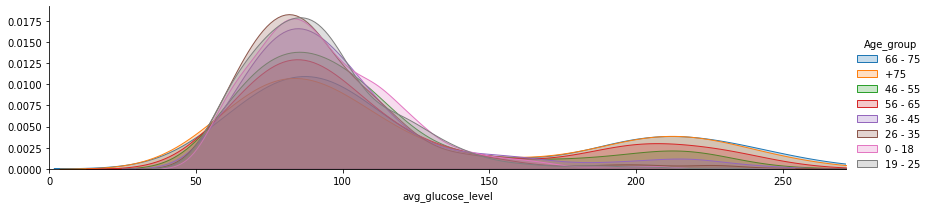

In [315]:
fig = sns.FacetGrid(data, hue="Age_group",aspect=4)
fig.map(sns.kdeplot,'avg_glucose_level',shade= True)
oldest = data['avg_glucose_level'].max()
fig.set(xlim=(0,oldest))
fig.add_legend()

> **Here we note the accumulation of average data for glucose glucose between the values of 80 to 100, and we also note some outliers from the largest mass of data, which is higher than 150 for the glucose level.**

> **I didn't get an explanation for why those outliers were.**

> **So if you are a specialist or have an explanation, please tell me in the comments.**

<AxesSubplot:xlabel='avg_glucose_level_group', ylabel='count'>

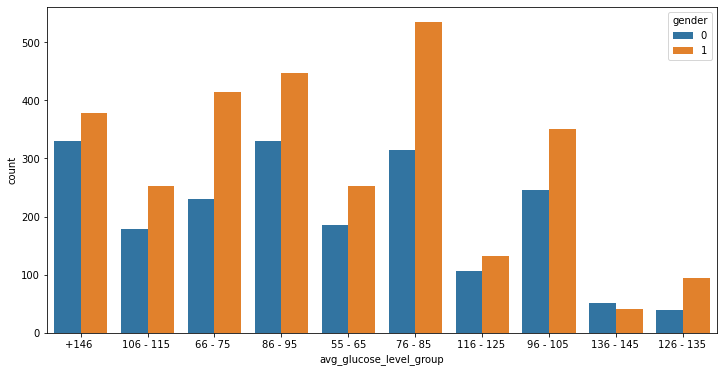

In [316]:
plt.figure(figsize=(12,6))
sns.countplot(data=data,x='avg_glucose_level_group',hue='gender')

**We note that women suffer more than men from fluctuations in the level of glucose sugar.**

> **After looking at some reviews and papers, we can conclude that the relationship between body mass and stroke incidence is ambiguous. There are no bases that we can take in the analysis. We were able to establish a strong relationship between stroke disease and body mass, so to delve deeper into this problem we need to expand the data And adding more features that have a relationship between the two.**

## 6.10 Smoking_status column

In [317]:
data["smoking_status"].unique()

array(['formerly smoked', 'never smoked', 'smokes', 'Unknown'],
      dtype=object)

<AxesSubplot:xlabel='smoking_status', ylabel='count'>

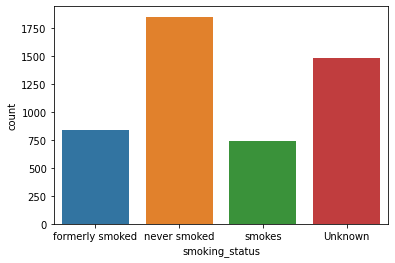

In [318]:
#Let's see these values on the graph.
sns.countplot(data=data,x='smoking_status')

<AxesSubplot:xlabel='smoking_status', ylabel='count'>

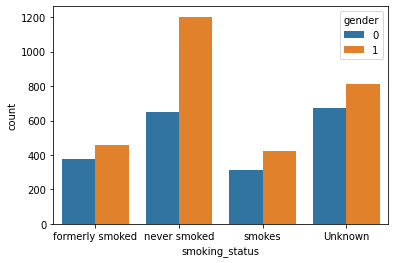

In [319]:
sns.countplot(data=data,x='smoking_status',hue='gender')

<AxesSubplot:xlabel='smoking_status', ylabel='count'>

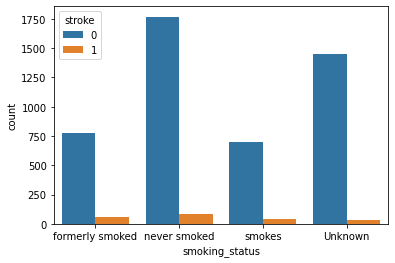

In [320]:
sns.countplot(data=data,x='smoking_status',hue='stroke')

> **We note from the figure that there is no difference in the incidence of stroke disease or not, whether the person is a smoker or not, or a former smoker.**

> **But we notice a very small increase in the incidence of stroke among smokers and former smokers.**

> **So you have to quit smoking.**

In [321]:
#Here we perform the process of data transformation to facilitate data visualizations.
data["smoking_status"]=data["smoking_status"].map({'formerly smoked':0, 'never smoked':1, 'smokes':2, 'Unknown':3 })

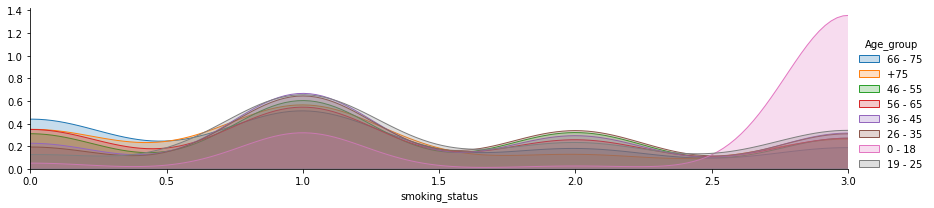

In [322]:
fig = sns.FacetGrid(data, hue="Age_group",aspect=4)
fig.map(sns.kdeplot,'smoking_status',shade= True)
oldest = data['smoking_status'].max()
fig.set(xlim=(0,oldest))
fig.add_legend()

In [323]:
data["smoking_status"].value_counts()

1    1852
3    1483
0     837
2     737
Name: smoking_status, dtype: int64

**There is a lot of interesting information and conclusions that I got and of course there is a lot of other information that we did not disclose using the data, but I just wanted to clarify a few things for now.**